## <small>
Copyright (c) 2017-21 Andrew Glassner

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
</small>



# Deep Learning: A Visual Approach
## by Andrew Glassner, https://glassner.com
### Order: https://nostarch.com/deep-learning-visual-approach
### GitHub: https://github.com/blueberrymusic
------

### What's in this notebook

This notebook is provided to help you work with Keras and TensorFlow. It accompanies the bonus chapters for my book. The code is in Python3, using the versions of libraries as of April 2021.

Note that I've included the output cells in this saved notebook, but Jupyter doesn't save the variables or data that were used to generate them. To recreate any cell's output, evaluate all the cells from the start up to that cell. A convenient way to experiment is to first choose "Restart & Run All" from the Kernel menu, so that everything's been defined and is up to date. Then you can experiment using the variables, data, functions, and other stuff defined in this notebook.

## Bonus Chapter 2 - Notebook 4: Training and running the model

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils
import numpy as np

import matplotlib.pyplot as plt

from keras import backend as keras_backend
keras_backend.set_image_data_format('channels_last')

Using TensorFlow backend.


In [2]:
# Workaround for Keras issues on Mac computers (you can comment this
# out if you're not on a Mac, or not having problems)
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
# Make a File_Helper for saving and loading files.

save_files = False

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.insert(0, os.path.dirname(current_dir)) # path to parent dir
from DLBasics_Utilities import File_Helper
file_helper = File_Helper(save_files)

In [4]:
random_seed = 42
np.random.seed(random_seed)

# load MNIST data and save sizes
(X_train, y_train), (X_test, y_test) = mnist.load_data()
image_height = X_train.shape[1]
image_width = X_train.shape[2]
number_of_pixels = image_height * image_width

# convert to floating-point
X_train = keras_backend.cast_to_floatx(X_train)
X_test = keras_backend.cast_to_floatx(X_test)

# scale data to range [0, 1]
X_train /= 255.0
X_test /= 255.0

# save the original y_train and y_test 
original_y_train = y_train
original_y_test = y_test

# replace label data with one-hot encoded versions
number_of_classes = 1 + max(np.append(y_train, y_test))
y_train = to_categorical(y_train, num_classes=number_of_classes)
y_test = to_categorical(y_test, num_classes=number_of_classes)

# reshape samples to 2D grid, one line per image
X_train = X_train.reshape([X_train.shape[0], number_of_pixels])
X_test = X_test.reshape([X_test.shape[0], number_of_pixels])

def make_one_hidden_layer_model():
    model = Sequential()
    model.add(Dense(number_of_pixels, activation='relu',
                    input_shape=[number_of_pixels]))
    model.add(Dense(number_of_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])
    return model

# make the model
one_hidden_layer_model = make_one_hidden_layer_model()

# call fit() to train the model, and save the history
one_hidden_layer_history = one_hidden_layer_model.fit(X_train, y_train, 
    validation_data=(X_test, y_test), epochs=3, batch_size=256, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
 - 4s - loss: 0.3051 - accuracy: 0.9141 - val_loss: 0.1642 - val_accuracy: 0.9524
Epoch 2/3
 - 3s - loss: 0.1241 - accuracy: 0.9643 - val_loss: 0.1039 - val_accuracy: 0.9704
Epoch 3/3
 - 4s - loss: 0.0814 - accuracy: 0.9763 - val_loss: 0.0816 - val_accuracy: 0.9747


In [5]:
# Try it again with 20 epochs. We'll re-build the
# model so we're starting with a fresh slate. We'll
# also re-seed the random number generator for repeatability.

np.random.seed(random_seed)

# make the model
one_hidden_layer_model = make_one_hidden_layer_model()

weights_filename = "NB4-one-hidden-layer-model"
if not file_helper.load_model_weights(one_hidden_layer_model, weights_filename):
    one_hidden_layer_model.fit(X_train, y_train, 
                               validation_data=(X_test, y_test), 
                               epochs=20, batch_size=256, verbose=2)
    file_helper.save_model_weights(one_hidden_layer_model, weights_filename)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 4s - loss: 0.3016 - accuracy: 0.9147 - val_loss: 0.1617 - val_accuracy: 0.9547
Epoch 2/20
 - 4s - loss: 0.1239 - accuracy: 0.9649 - val_loss: 0.1026 - val_accuracy: 0.9699
Epoch 3/20
 - 4s - loss: 0.0812 - accuracy: 0.9762 - val_loss: 0.0823 - val_accuracy: 0.9752
Epoch 4/20
 - 4s - loss: 0.0576 - accuracy: 0.9835 - val_loss: 0.0738 - val_accuracy: 0.9789
Epoch 5/20
 - 4s - loss: 0.0419 - accuracy: 0.9882 - val_loss: 0.0661 - val_accuracy: 0.9798
Epoch 6/20
 - 4s - loss: 0.0314 - accuracy: 0.9916 - val_loss: 0.0604 - val_accuracy: 0.9812
Epoch 7/20
 - 4s - loss: 0.0236 - accuracy: 0.9942 - val_loss: 0.0657 - val_accuracy: 0.9804
Epoch 8/20
 - 4s - loss: 0.0192 - accuracy: 0.9955 - val_loss: 0.0583 - val_accuracy: 0.9813
Epoch 9/20
 - 4s - loss: 0.0133 - accuracy: 0.9972 - val_loss: 0.0607 - val_accuracy: 0.9814
Epoch 10/20
 - 4s - loss: 0.0102 - accuracy: 0.9982 - val_loss: 0.0653 - val_accuracy: 0.9800
Epoch 11/20
 - 4s -

In [6]:
# build the error grid. each [y][x] is a list of all test images
# with label y, but were mis-categorized as x
predictions = one_hidden_layer_model.predict_classes(X_test, verbose=0)

error_grid = [[[] for x in range(10)] for y in range(10)] 
matchList = predictions == original_y_test
errorCount = 0
for i in range(matchList.size):
    if matchList[i] != True:
        error_grid[original_y_test[i]][predictions[i]].append(i)

In [7]:
# how many did we get right?
pred_right = np.sum(matchList)
pred_wrong = len(original_y_test)-pred_right
print("Correct predictions = ",pred_right," out of ",len(original_y_test))
print("Incorrect predictions = ",pred_wrong)

Correct predictions =  9836  out of  10000
Incorrect predictions =  164


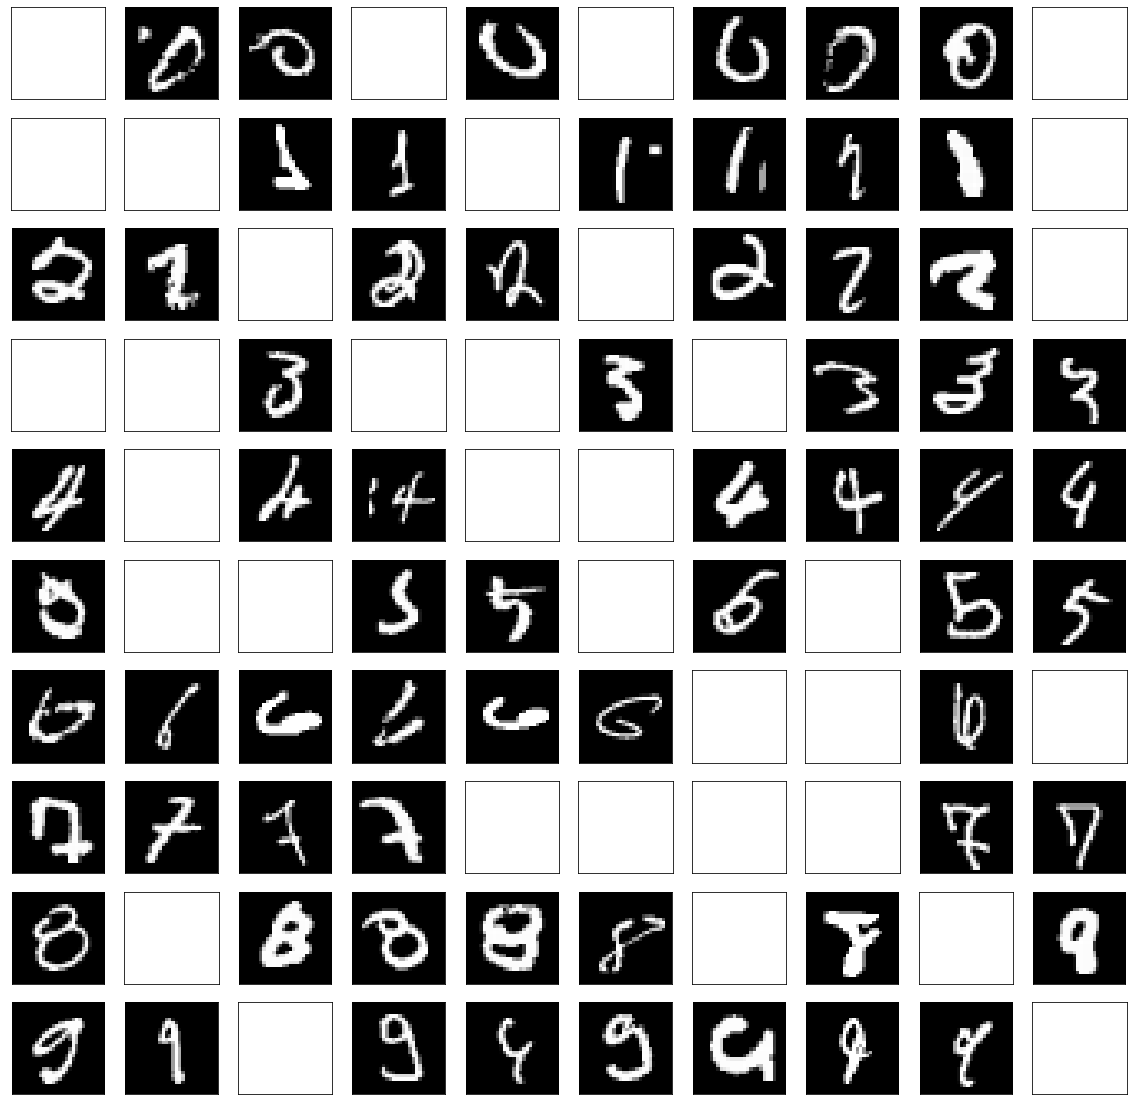

In [8]:
# show the first image in each cell of the error grid
plt.figure(figsize=(20,20))
for y in range(10):
    for x in range(10):
        plt.subplot(10, 10, 1 + (y*10) + x)
        if error_grid[y][x]:
            list_index = error_grid[y][x][0]
            #print("list_index = ",list_index)
            img = X_test[list_index].reshape(28, 28)
            plt.imshow(img, cmap=plt.get_cmap('gray'))
        frame = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)
file_helper.save_figure('Prediction-error-examples')
plt.show()

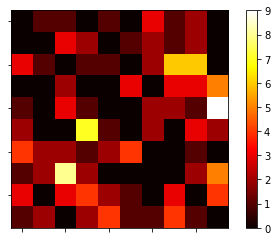

In [9]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# show a heat map of the length of each error list
gridsize = [[len(error_grid[y][x]) for x in range(10)] for y in range(10)]
fig, ax = plt.subplots()
im = plt.imshow(gridsize, cmap='hot', interpolation='nearest')
ax = plt.gca()
ax.set_yticklabels([])
ax.set_xticklabels([])
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.25)
fig.colorbar(im, cax=cax, orientation='vertical')
file_helper.save_figure('Prediction-error-heatmap')
plt.show()